In [2]:
import os
from os.path import exists

import re
import numpy as np

import pandas as pd 
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

import seaborn as sns

# Ragas grouped by Rasas

In [5]:
path_rasa_list = '../ComputationalMusicology-TheRagaGuide/RagaList.xlsx'
raga_rasa = pd.read_excel(path_rasa_list)[['Raga', 'FileName', 'Rasa']]

display(raga_rasa)
display(raga_rasa.groupby(['Rasa']).count().sort_values('Raga', ascending=False).head(5))

,Raga,FileName,Rasa
0,Abhogi,Abhogi_D1T1.txt,Virah
1,Adana,Adana_D1T2.txt,Veer
2,Ahir Bhairav,Ahir_bhairav_D1T3.txt,Bhakti
3,Alhaiya bilaval,Alhaiya_bilaval_D1T4.txt,Adbhut
4,Asavari,Asavari_D1T5.txt,Bhakti
...,...,...,...
69,Sohini,sohini.txt,Karuna
70,Sur Malhar,sur_malhar.txt,Adbhut
71,Tilak Kamod,tilak_kamod.txt,Hasya
72,Tilang,tilang.txt,Shringar


,Raga,FileName
Rasa,,
Shringar,33,33
Bhakti,11,11
Karuna,7,7
Adbhut,5,5
Veer,5,5


Q#1: A basic distribution of a main variable of interest in your corpus (e.g., distribution of works by year, distribution of tempi, distribution of phrase lengths, distribution of chord types, etc.) You may additionally wish to add a grouping variable to this distribution (e.g., perhaps there are two composers; major versus minor keys; etc.) This latter condition is optional. \

Ans: We are studying the melodic similarities among ragas of the same rasa. Our main variable of interest is the notes or swaras. We choose the scale degree (swara) distribution of each raga within a rasa and plot the correlation matrix between the distributions of all the ragas.

In [6]:
#utility function

def get_token_tallies(file):
    if exists(file)==False:
        return -1
    with open(file, 'r') as f:
        lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].strip()
    return lines
    
def plot_hist(file_with_lines):
    
    w = Counter(file_with_lines)
#     print(w.items())
#     print(OrderedDict(sorted(w.items())))
    w = OrderedDict(sorted(w.items()))
    
    plt.rcParams["figure.figsize"] = (20,3)
    plt.bar(w.keys(), w.values())
    plt.show()

def make_corr_arrays(file_with_lines):
    scale = ['1', '2-', '2', '3-', '3', '4', '4+', '5', '6-', '6', '7-', '7']
    w = Counter(file_with_lines)
    scale_degree_frequency=np.zeros(12)
    for i in range(len(scale)):
        if scale[i] in w.keys():
            scale_degree_frequency[i] = w[scale[i]]
         
    return scale_degree_frequency.astype(int)

def get_swara_distribution_per_raga(rasa_dataframe):
    raga_names = []
    rasa_swara_distribution_per_raga = np.empty((len(rasa_dataframe), 12))

    for i in rasa_dataframe.index:
        path = 'Analysis/deg_files/'+str(rasa_dataframe['FileName'].loc[i])+'.deg'
        rasa_lines = get_token_tallies(path)
        if rasa_lines == -1:
            continue
        raga_names.append(rasa_dataframe['Raga'].loc[i])
        rasa_lines = [line for line in rasa_lines if not re.search(r'[*]', line)]
        scale_deg_dist_rasa = make_corr_arrays(rasa_lines)
        rasa_swara_distribution_per_raga[i] = scale_deg_dist_rasa
    return rasa_swara_distribution_per_raga, raga_names

# Adbhut

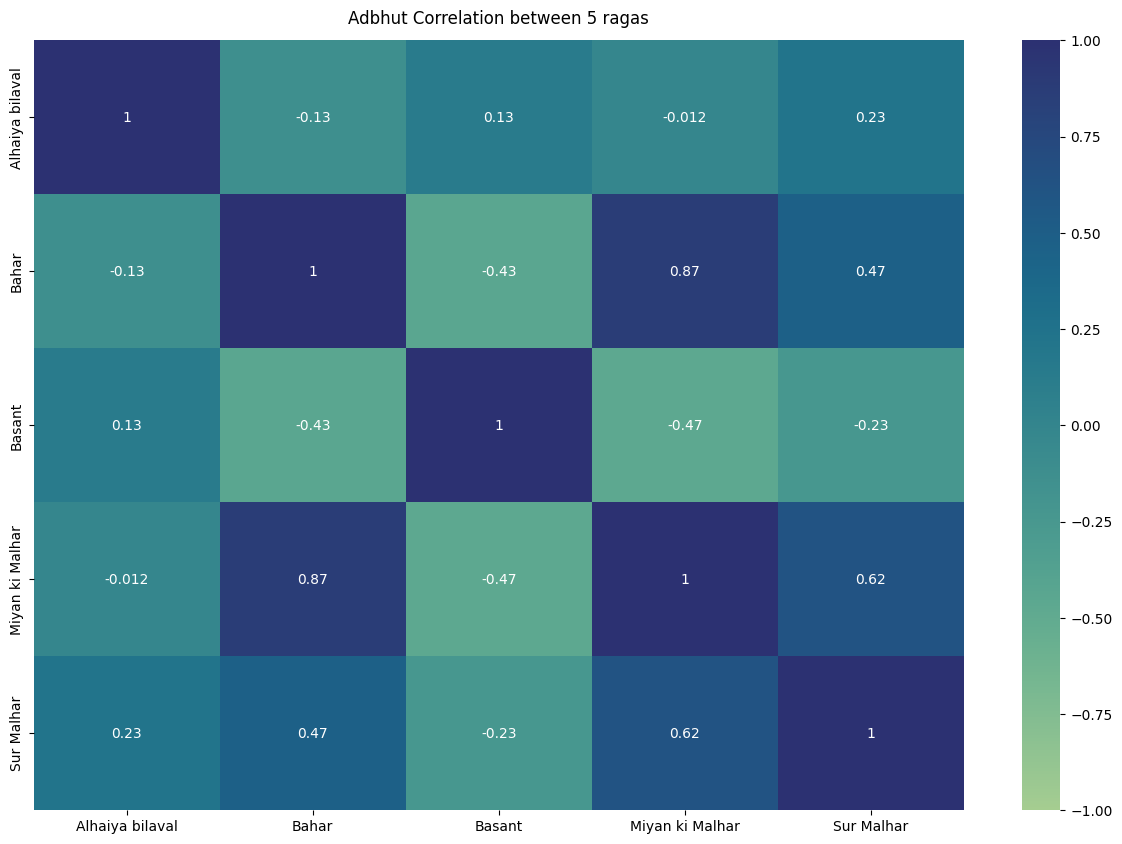

In [255]:
adbhut = raga_rasa[raga_rasa['Rasa'] == 'Adbhut'].reset_index()[['Raga', 'FileName', 'Rasa']]
# adbhut
R1 = np.corrcoef(adbhut_corr_matrix)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(R1, annot=True, vmin=-1, vmax=1, 
                      cmap="crest", 
                      xticklabels=adbhut['Raga'].tolist(),
                      yticklabels=adbhut['Raga'].tolist());
heatmap.set_title('Adbhut Correlation between 5 ragas',
                  fontdict={'fontsize':12}, pad=12);

# Shringar

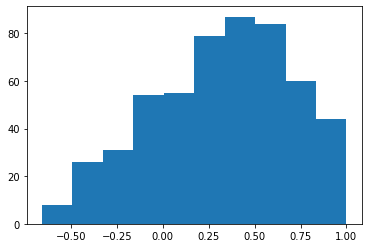

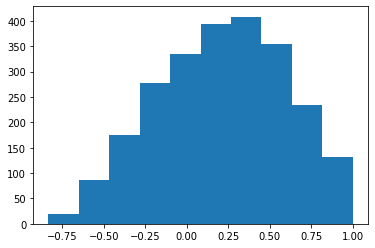

In [40]:
shringar = raga_rasa[raga_rasa['Rasa'] == 'Shringar'].reset_index()[['Raga', 'FileName', 'Rasa']]

shringar_swara_distribution_per_raga, raga_names_shringar = get_swara_distribution_per_raga(shringar)
all_ragas, raga_names = get_swara_distribution_per_raga(raga_rasa)

R1 = np.corrcoef(shringar_swara_distribution_per_raga)
R2 = np.corrcoef(all_ragas)

pairwise_corr_list_shringhar = []
for i in range(1, len(R1)):
    for j in range(i, len(R1[0])):
        pairwise_corr_list_shringhar.append(R1[i][j])
        
pairwise_corr_list = []
for i in range(1, len(R2)):
    for j in range(i, len(R2[0])):
        pairwise_corr_list.append(R2[i][j])
        
# pairwise_corr_list_shringhar
plt.hist(pairwise_corr_list_shringhar)
plt.show()

plt.hist(pairwise_corr_list)
plt.show()




Text(0.5, 1.0, 'Shringar Correlation between 5 ragas')

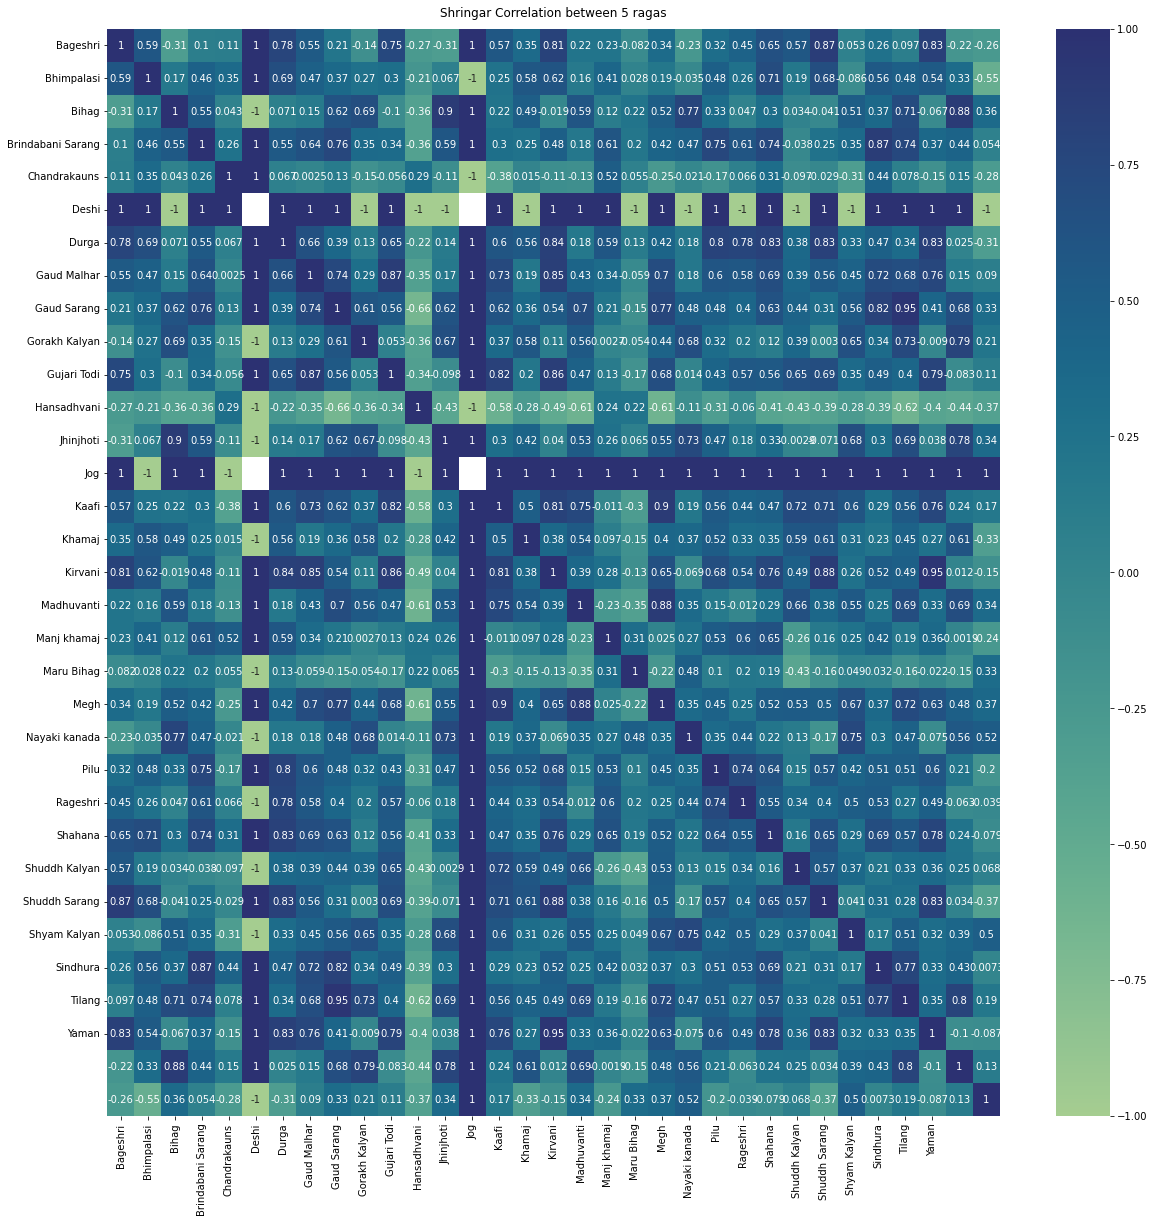

In [32]:
shringar = raga_rasa[raga_rasa['Rasa'] == 'Shringar'].reset_index()[['Raga', 'FileName', 'Rasa']]

shringar_swara_distribution_per_raga, raga_names = get_swara_distribution_per_raga(shringar)
R1 = np.corrcoef(shringar_swara_distribution_per_raga)
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(R1, annot=True, vmin=-1, vmax=1, 
                      cmap="crest", 
                      xticklabels = raga_names,
                      yticklabels = raga_names);
heatmap.set_title('Shringar Correlation between 5 ragas',
                  fontdict={'fontsize':12}, pad=12)


# Veer

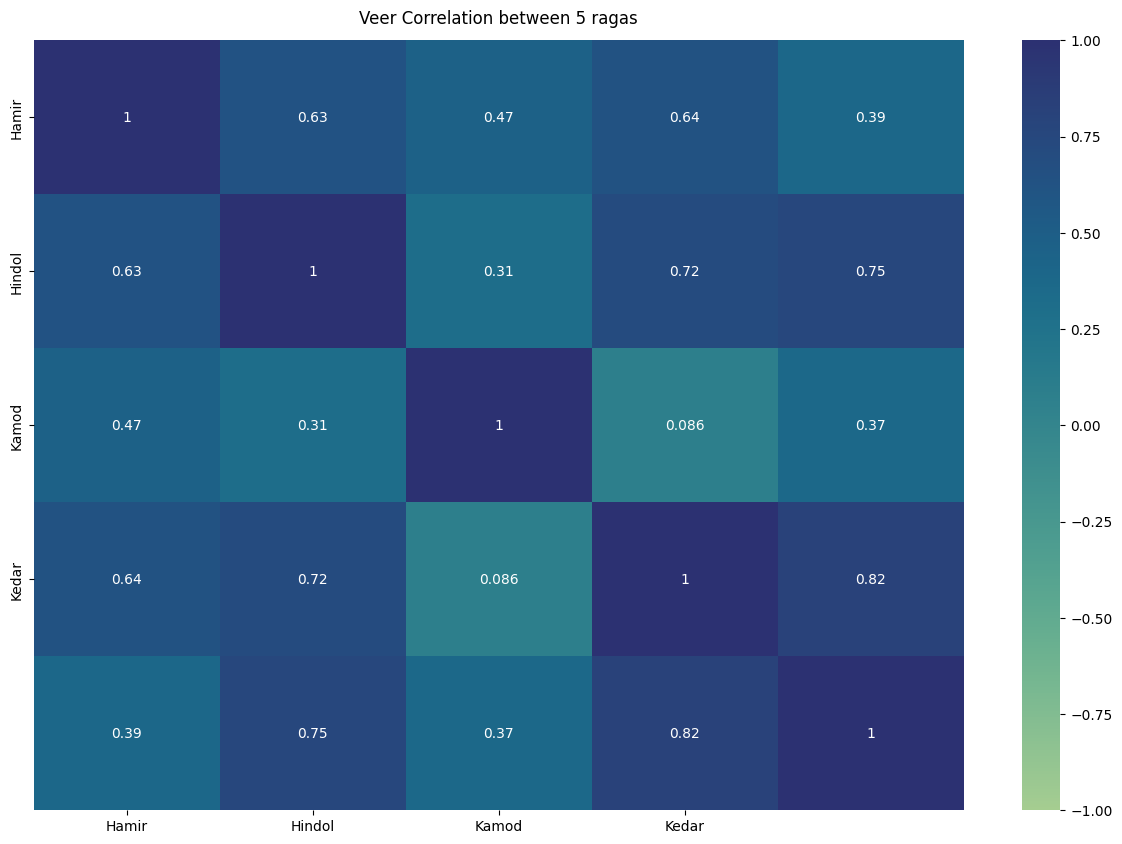

In [248]:
veer = raga_rasa[raga_rasa['Rasa'] == 'Veer'].reset_index()[['Raga', 'FileName', 'Rasa']]

veer_swara_distribution_per_raga, raga_names = get_swara_distribution_per_raga(veer)
R1 = np.corrcoef(veer_swara_distribution_per_raga)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(R1, annot=True, vmin=-1, vmax=1, 
                      cmap="crest", 
                      xticklabels = raga_names,
                      yticklabels = raga_names);
heatmap.set_title('Veer Correlation between 5 ragas',
                  fontdict={'fontsize':12}, pad=12);

# Bhakti

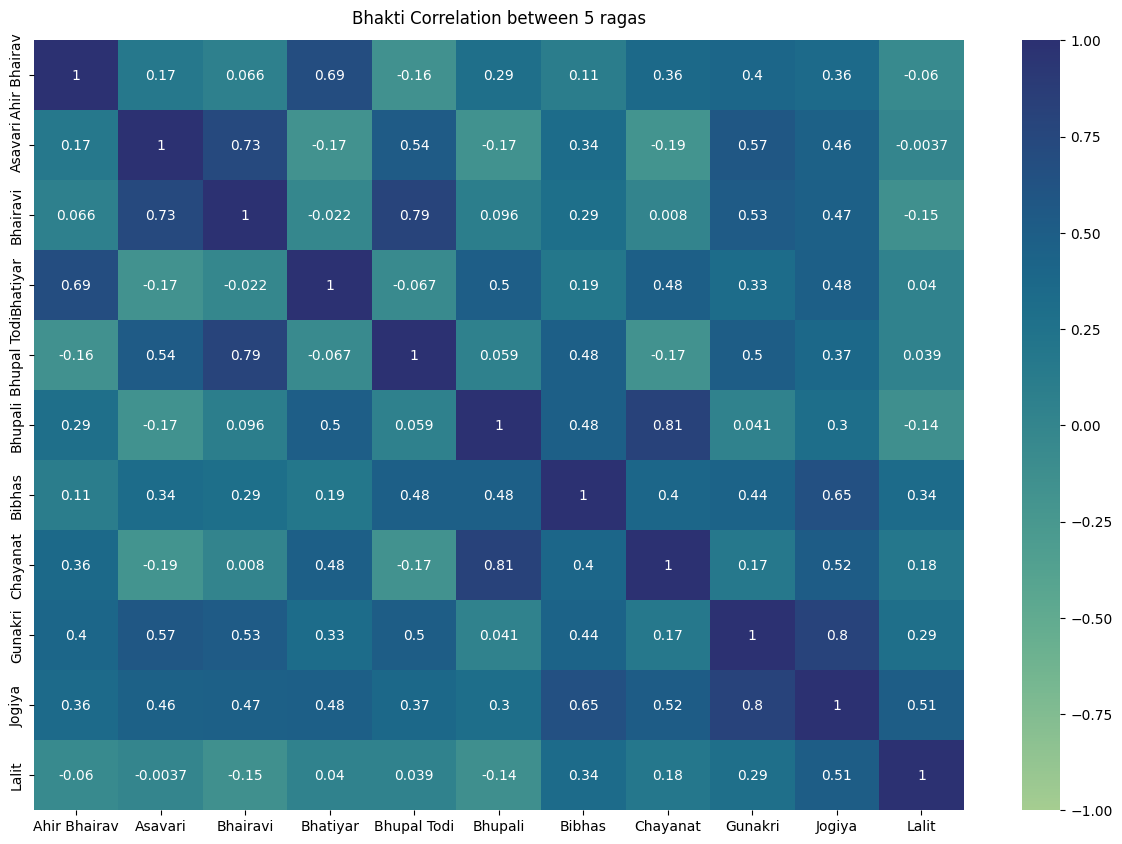

In [245]:
#bhakti or devotion

bhakti = raga_rasa[raga_rasa['Rasa'] == 'Bhakti'].reset_index()[['Raga', 'FileName', 'Rasa']]

bhakti_swara_distribution_per_raga, raga_names = get_swara_distribution_per_raga(bhakti)
R1 = np.corrcoef(bhakti_swara_distribution_per_raga)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(R1, annot=True, vmin=-1, vmax=1, 
                      cmap="crest", 
                      xticklabels = raga_names,
                      yticklabels = raga_names);
heatmap.set_title('Bhakti Correlation between 5 ragas',
                  fontdict={'fontsize':12}, pad=12);

# Karuna

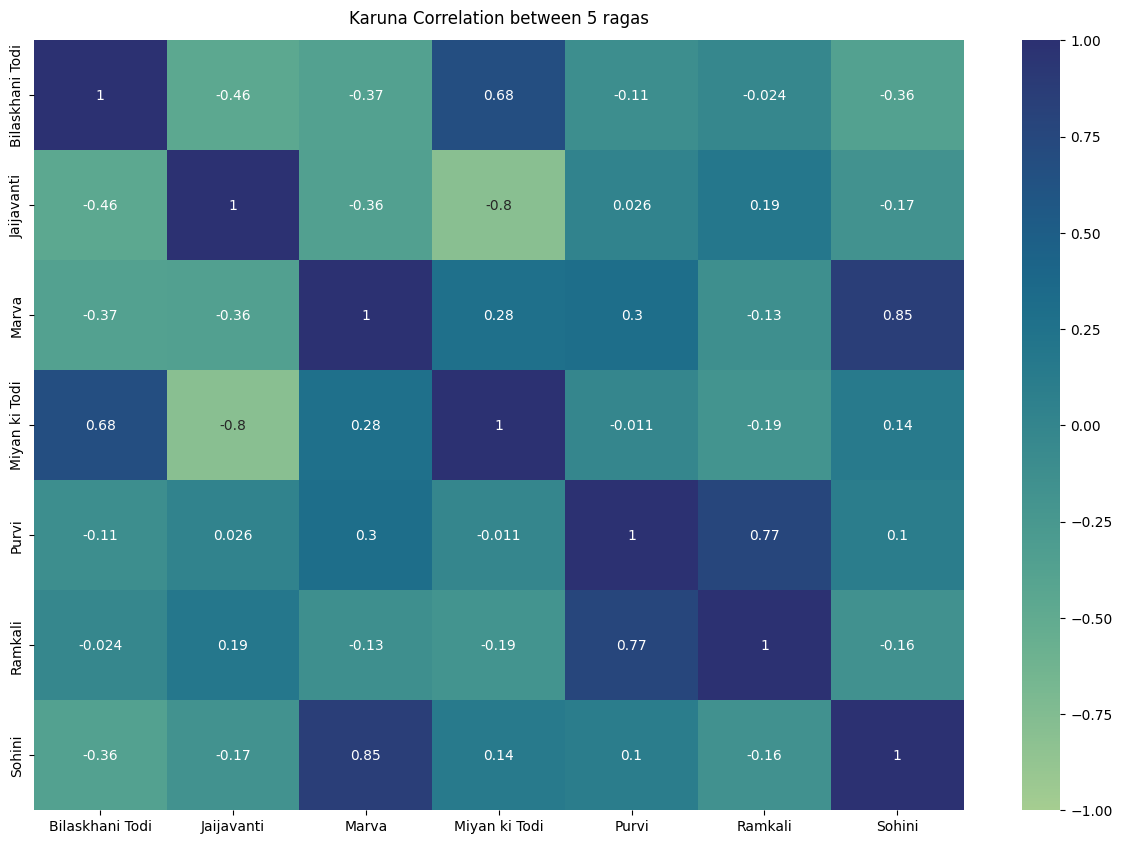

In [244]:
# Karuna or Sadness


karuna = raga_rasa[raga_rasa['Rasa'] == 'Karuna'].reset_index()[['Raga', 'FileName', 'Rasa']]

karuna_swara_distribution_per_raga, raga_names = get_swara_distribution_per_raga(karuna)
R1 = np.corrcoef(karuna_swara_distribution_per_raga)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(R1, annot=True, vmin=-1, vmax=1, 
                      cmap="crest", 
                      xticklabels = raga_names,
                      yticklabels = raga_names);
heatmap.set_title('Karuna Correlation between 5 ragas',
                  fontdict={'fontsize':12}, pad=12);